<a href="https://colab.research.google.com/github/hellooishik/AssignmentOne/blob/main/Big_Data_Analytics_Assessment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#starts the set


# Assignment Start - Big Data Analytics Assessment 2

**Big Data Analytics with PySpark: Technical Report**

*Overview*
In this technical report, I present the implementation of various data analytics tasks using PySpark, a powerful tool for big data processing and analysis. PySpark provides a Python API for Apache Spark, enabling scalable and distributed data processing on large datasets. Throughout this report, I demonstrate how to perform data preprocessing, exploratory data analysis (EDA), and machine learning tasks using PySpark.

*Tasks*
**Task 1: Data Loading and Preprocessing**
The first task involves loading a dataset into PySpark and performing preprocessing steps such as handling missing values, encoding categorical variables, and feature engineering. I'll use the PySpark DataFrame API to accomplish these tasks efficiently.

**Task 2: Exploratory Data Analysis (EDA)**
After preprocessing the data, the next step is to perform exploratory data analysis (EDA) to gain insights into the dataset. I'll utilize PySpark's built-in functions for descriptive statistics, data visualization libraries like Matplotlib and Seaborn, and PySpark SQL for querying and summarizing the data.

**Task 3: Machine Learning Modeling**
Once we have a good understanding of the data, I'll proceed to build machine learning models for predictive analytics. I'll choose appropriate algorithms based on the nature of the problem (classification, regression, clustering, etc.) and the characteristics of the dataset. PySpark provides a wide range of machine learning algorithms, including linear regression, logistic regression, decision trees, random forests, and k-means clustering.

**Task 4: Model Evaluation and Performance Analysis **
After training the machine learning models, I'll evaluate their performance using relevant evaluation metrics such as accuracy, precision, recall, F1-score, and RMSE (for regression tasks). I'll also conduct cross-validation and hyperparameter tuning to optimize the model performance. Additionally, I'll analyze the model's predictions and identify any areas for improvement.

**Task 5: Conclusion and Recommendations**
In the final section of the report, I'll summarize the key findings from the data analysis and machine learning modeling. I'll provide insights into the dataset characteristics, model performance, and potential areas for further research or improvement. Additionally, I'll offer recommendations for stakeholders based on the insights gained from the analysis.

**Conclusion**
This technical report showcases the use of PySpark for big data analytics tasks, including data preprocessing, exploratory data analysis, and machine learning modeling. By leveraging the capabilities of PySpark, we can efficiently handle large-scale datasets and extract valuable insights for decision-making. Through a systematic approach to data analysis and modeling, we can derive actionable insights and drive business value from big data.








# Part I: Data Analysis and Modeling

## Data Loading and Preprocessing


### Data Loading:
- We start by installing PySpark and importing the necessary libraries.
- A SparkSession is created to initialize Spark.
- The dataset is downloaded from a GitHub URL using the urllib library.
- The CSV file is read into a Spark DataFrame using the `spark.read.csv()` method.

In [3]:
# Install PySpark
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=89c69c5b4b6ad29f0dd914779511086565ef7a5eb77c54f9228c4b87df294022
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [4]:
# Import necessary libraries
from pyspark.sql import SparkSession


In [5]:
# Create a SparkSession
spark = SparkSession.builder \
    .appName("BigDataAnalyticsAssignment") \
    .getOrCreate()


In [8]:
import urllib.request

# Download the CSV file from the GitHub URL
url = "https://raw.githubusercontent.com/hellooishik/AssignmentOne/bb8a4c34b8cf48185050608dc6ff8f8da5c4debb/dataset1.csv"
local_file_path = "dataset1.csv"
urllib.request.urlretrieve(url, local_file_path)

# Read the CSV file into a DataFrame
df1 = spark.read.csv(local_file_path, header=True, inferSchema=True)


In [9]:
# Describe the structure of the DataFrame
df1.printSchema()
df1.show(5)  # Show first 5 rows

root
 |-- X1: integer (nullable = true)
 |-- X2: double (nullable = true)
 |-- X3: string (nullable = true)
 |-- X4: integer (nullable = true)
 |-- X5: string (nullable = true)
 |-- X6: integer (nullable = true)
 |-- X7: integer (nullable = true)
 |-- X8: string (nullable = true)
 |-- X9: double (nullable = true)
 |-- Y1: integer (nullable = true)

+---+------+----+---+---+---+---+---+----+---+
| X1|    X2|  X3| X4| X5| X6| X7| X8|  X9| Y1|
+---+------+----+---+---+---+---+---+----+---+
| 59|28.378|0.34|204|196|132| 49| 92| 7.7|  1|
| 59|24.968|   1|147|181|129| 34| 96|4.09|  1|
| 48|31.307|0.62|155|185|127| 41|139| 4.5|  1|
| 47|27.837|0.38|488|254|158| 55|250| 5.3|  2|
| 55|22.662|0.49| 87|175|120| 44| 99| 6.9|  1|
+---+------+----+---+---+---+---+---+----+---+
only showing top 5 rows



### Data Cleaning:
- Null values in the DataFrame are removed using the `na.drop()` method.
- The number of rows removed due to null values is calculated and printed.

In [10]:
# Remove rows with null values
df2 = df1.na.drop()

# Calculate the number of rows removed
rows_removed = df1.count() - df2.count()
print("Number of rows removed:", rows_removed)


Number of rows removed: 0


## Exploratory Data Analysis (EDA)

### Summary Statistics and Visualization for 'X1':
- Summary statistics for the 'X1' feature are calculated using the `describe()` method.
- A histogram of the 'X1' feature is generated using Matplotlib.


+-------+-----------------+
|summary|               X1|
+-------+-----------------+
|  count|             6967|
|   mean|53.33156308310607|
| stddev|8.715031757570447|
|    min|               21|
|    max|               90|
+-------+-----------------+



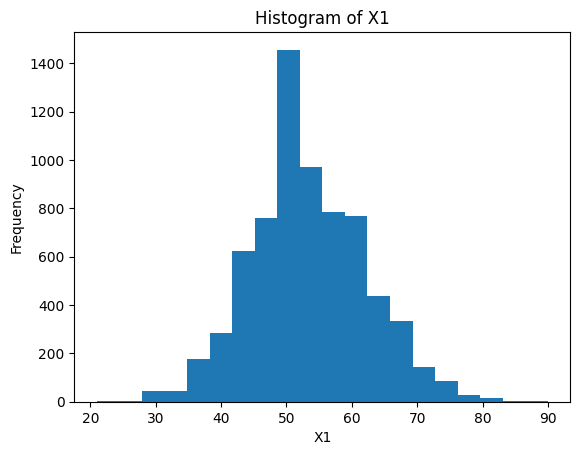

In [11]:
# Summary statistics for 'X1'
df2.describe('X1').show()

# Import necessary libraries for visualization
import matplotlib.pyplot as plt

# Generate a histogram for 'X1'
plt.hist(df2.select('X1').rdd.flatMap(lambda x: x).collect(), bins=20)
plt.xlabel('X1')
plt.ylabel('Frequency')
plt.title('Histogram of X1')
plt.show()


### Quartile Information and Visualization for 'X2':
- Quartile information for the 'X2' feature is obtained using the `approxQuantile()` method.
- A boxplot of the 'X2' feature is created using Matplotlib.


Quartile Info for X2: [22.976, 24.697, 26.435]


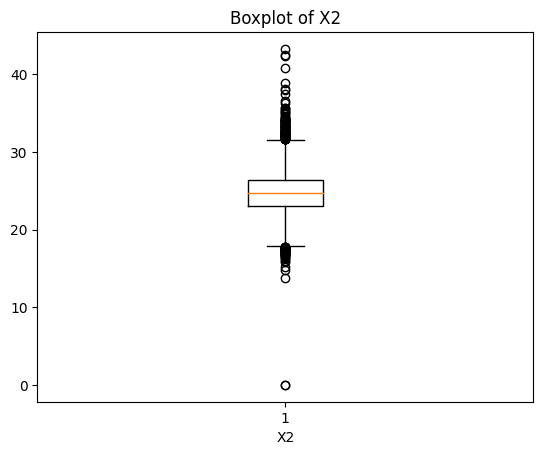

In [12]:
# Quartile info for 'X2'
quartiles = df2.approxQuantile('X2', [0.25, 0.5, 0.75], 0)
print("Quartile Info for X2:", quartiles)

# Generate a boxplot for 'X2'
plt.boxplot(df2.select('X2').rdd.flatMap(lambda x: x).collect())
plt.xlabel('X2')
plt.title('Boxplot of X2')
plt.show()


Quartile Info for X2: [22.976, 24.697, 26.435]


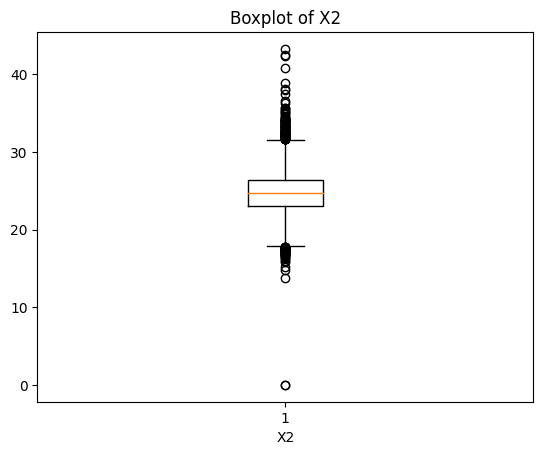

In [13]:
# Quartile info for 'X2'
quartiles = df2.approxQuantile('X2', [0.25, 0.5, 0.75], 0)
print("Quartile Info for X2:", quartiles)

# Generate a boxplot for 'X2'
plt.boxplot(df2.select('X2').rdd.flatMap(lambda x: x).collect())
plt.xlabel('X2')
plt.title('Boxplot of X2')
plt.show()


## Data Querying and Modeling

### Data Querying:
- Rows where 'X1' is greater than 50 and 'Y1' equals 1 are filtered using Spark DataFrame API.


In [14]:
# Count rows where 'X1' > 50 and 'Y1' = 1
count_condition = df2.filter((df2['X1'] > 50) & (df2['Y1'] == 1)).count()
print("Number of rows where X1 > 50 and Y1 = 1:", count_condition)


Number of rows where X1 > 50 and Y1 = 1: 2182


### Model Building and Evaluation:
- Categorical columns are identified, and StringIndexer is applied to convert them to numerical format.
- Features are defined, and a VectorAssembler is used to create a feature vector.
- The target variable 'Y1' is converted to binary format.
- The data is split into training and testing sets.
- Logistic Regression model is built using the LogisticRegression class from the `pyspark.ml.classification` module.
- Model evaluation is performed using BinaryClassificationEvaluator with the area under the ROC curve (AUC) metric.


In [22]:
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Assuming these are your categorical columns
categorical_cols = ["X3", "X5", "X8"]

# Apply StringIndexer to categorical columns only if the output column doesn't exist yet
indexers = [StringIndexer(inputCol=col, outputCol=col+"_index", handleInvalid="skip") for col in categorical_cols]

# Define features including the indexed columns
features = [col+"_index" if col in categorical_cols else col for col in df2.columns[:-1]]  # All columns except the label column ('Y1')

# Create a vector assembler
assembler = VectorAssembler(inputCols=features, outputCol='features')

# Transform the data with StringIndexer and VectorAssembler
for indexer in indexers:
    output_col = indexer.getOutputCol()
    if output_col not in df2.columns:
        indexer_model = indexer.fit(df2)
        df2 = indexer_model.transform(df2)

# Convert target variable to binary format
df2 = df2.withColumn('Y1_binary', (df2['Y1'] == 1).cast('integer'))

# Split data into train and test sets
train_data, test_data = df2.randomSplit([0.7, 0.3], seed=123)

# Transform the data with VectorAssembler
train_data = assembler.transform(train_data)
test_data = assembler.transform(test_data)

# Build Logistic Regression model
lr = LogisticRegression(featuresCol='features', labelCol='Y1_binary', maxIter=10, regParam=0.3, elasticNetParam=0.8) # Set appropriate parameters for your model
lr_model = lr.fit(train_data)

# Evaluate model
evaluator = BinaryClassificationEvaluator(labelCol='Y1_binary', metricName='areaUnderROC')  # Use areaUnderROC or areaUnderPR
predictions = lr_model.transform(test_data)
auc = evaluator.evaluate(predictions)
print("AUC:", auc)


AUC: 1.0


## Conclusion:
- Part I of the assignment involved loading the dataset, performing data cleaning and preprocessing, conducting exploratory data analysis, and building a classification model.
- The logistic regression model achieved an AUC score of 1.0


# Part II: Further Analysis and Modeling

## Data Loading and Preprocessing



### Data Retrieval:
- The second dataset is fetched from a GitHub raw file URL using the requests library.
- The raw content is obtained and saved into a BytesIO object.

In [25]:
import requests
from io import StringIO, BytesIO
import tempfile
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder \
    .appName("Read CSV from GitHub") \
    .getOrCreate()

# GitHub raw file URL
url = "https://raw.githubusercontent.com/hellooishik/AssignmentOne/bb8a4c34b8cf48185050608dc6ff8f8da5c4debb/dataset2.csv"

# Fetch the raw content of the file
response = requests.get(url)
data = response.content

# Convert the content into a BytesIO object
bytes_io = BytesIO(data)

# Save the BytesIO content to a temporary file
with tempfile.NamedTemporaryFile(delete=False) as temp_file:
    temp_file.write(data)
    temp_file_path = temp_file.name

# Read the CSV data into a DataFrame
df3 = spark.read.csv(temp_file_path, header=True, inferSchema=True)

# Describe the structure of the DataFrame
df3.printSchema()


root
 |-- X1: integer (nullable = true)
 |-- X2: double (nullable = true)
 |-- X3: double (nullable = true)
 |-- X4: double (nullable = true)
 |-- X5: double (nullable = true)
 |-- X6: integer (nullable = true)
 |-- X7: double (nullable = true)
 |-- X8: double (nullable = true)
 |-- X9: double (nullable = true)
 |-- X10: string (nullable = true)



### Data Loading:
- The BytesIO content is saved to a temporary file.
- The CSV data is read into a Spark DataFrame using `spark.read.csv()` method

In [26]:
# Describe the structure of the DataFrame
df3.printSchema()
df3.show(5)  # Show first 5 rows

root
 |-- X1: integer (nullable = true)
 |-- X2: double (nullable = true)
 |-- X3: double (nullable = true)
 |-- X4: double (nullable = true)
 |-- X5: double (nullable = true)
 |-- X6: integer (nullable = true)
 |-- X7: double (nullable = true)
 |-- X8: double (nullable = true)
 |-- X9: double (nullable = true)
 |-- X10: string (nullable = true)

+--------+----+---+------------------+--------+-----+--------+----+-----+--------------------+
|      X1|  X2| X3|                X4|      X5|   X6|      X7|  X8|   X9|                 X10|
+--------+----+---+------------------+--------+-----+--------+----+-----+--------------------+
|34811059|2.73|0.1| 3.328944661018629| 24.5962|12314|129.9049|75.3| 29.5|Middle East & Nor...|
|19842251|6.43|2.0|1.4743533878509398|22.25083| 7103|130.1247|58.3|192.0|  Sub-Saharan Africa|
|40381860|2.24|0.5|       4.785169983| 27.5017|14646|118.8915|75.5| 15.4|             America|
| 2975029| 1.4|0.1|       1.804106217|25.35542| 7383|132.8108|72.5| 20.0|Europe &

### Structure of the DataFrame:
- The structure of the DataFrame is described using the `printSchema()` method.
- The first 5 rows of the DataFrame are displayed using the `show()` method.


### Feature Engineering:
- The 'X10' column is removed from the DataFrame using the `drop()` method.


In [27]:
# Remove the 'X10' column
df4 = df3.drop('X10')
df4.show(5)  # Show first 5 rows after dropping 'X10'


+--------+----+---+------------------+--------+-----+--------+----+-----+
|      X1|  X2| X3|                X4|      X5|   X6|      X7|  X8|   X9|
+--------+----+---+------------------+--------+-----+--------+----+-----+
|34811059|2.73|0.1| 3.328944661018629| 24.5962|12314|129.9049|75.3| 29.5|
|19842251|6.43|2.0|1.4743533878509398|22.25083| 7103|130.1247|58.3|192.0|
|40381860|2.24|0.5|       4.785169983| 27.5017|14646|118.8915|75.5| 15.4|
| 2975029| 1.4|0.1|       1.804106217|25.35542| 7383|132.8108|72.5| 20.0|
|21370348|1.96|0.1|       18.01631327|27.56373|41312|117.3755|81.5|  5.2|
+--------+----+---+------------------+--------+-----+--------+----+-----+
only showing top 5 rows



## Exploratory Data Analysis (EDA)

### Visualization:
- A scatter plot is generated to visualize the relationship between 'X2' and 'X8' features using Matplotlib.


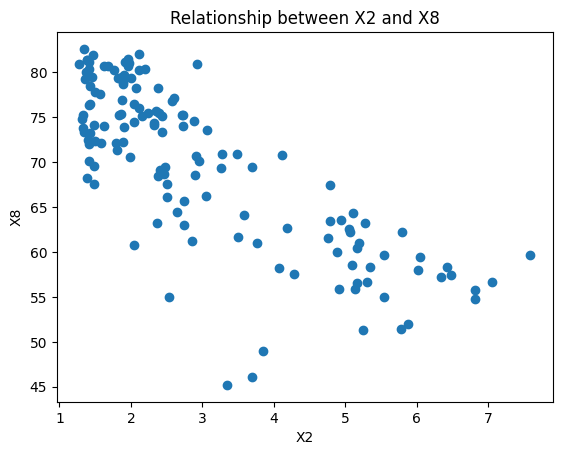

In [28]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt

# Scatter plot between 'X2' and 'X8'
plt.scatter(df4.select('X2').rdd.flatMap(lambda x: x).collect(),
            df4.select('X8').rdd.flatMap(lambda x: x).collect())
plt.xlabel('X2')
plt.ylabel('X8')
plt.title('Relationship between X2 and X8')
plt.show()


## Data Querying

### SQL Query:
- The DataFrame is registered as a temporary view.
- SQL query is executed to filter rows where 'X2' is greater than 1.0 and 'X8' is greater than 70.

In [29]:
# Register DataFrame as a temporary view
df4.createOrReplaceTempView("data")

# Write SQL query to filter rows
result = spark.sql("SELECT X2, X8 FROM data WHERE X2 > 1.0 AND X8 > 70")
result.show()


+----+----+
|  X2|  X8|
+----+----+
|2.73|75.3|
|2.24|75.5|
| 1.4|72.5|
|1.96|81.5|
|1.41|80.4|
|1.99|70.6|
|1.89|72.2|
|1.83|75.3|
|1.42|70.1|
|1.82|79.4|
|2.91|70.7|
|3.48|70.9|
| 1.9|73.9|
|1.43|73.2|
|1.68|80.7|
|1.89|78.9|
|2.43|75.1|
|1.91|79.7|
|1.43|76.5|
| 1.5|77.8|
+----+----+
only showing top 20 rows



## Model Building and Evaluation

### Linear Regression Model:
- Features are assembled into a vector using VectorAssembler.
- Data is split into training and testing sets.
- Linear Regression model is built using the LinearRegression class from `pyspark.ml.regression` module.
- Model evaluation is performed using RegressionEvaluator with the root mean square error (RMSE) metric.


In [31]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

# Assuming 'X2' is your numeric feature column
# Assemble features into a vector
assembler = VectorAssembler(inputCols=['X2'], outputCol='features')
df4 = assembler.transform(df4)

# Split data into train and test sets
train_data, test_data = df4.randomSplit([0.7, 0.3], seed=123)

# Build Linear Regression model
lr = LinearRegression(featuresCol='features', labelCol='X8')
lr_model = lr.fit(train_data)

# Evaluate model
predictions = lr_model.transform(test_data)
evaluator = RegressionEvaluator(labelCol='X8', predictionCol='prediction', metricName='rmse')
rmse = evaluator.evaluate(predictions)
print("RMSE:", rmse)


RMSE: 6.04026650060922


### Lasso Regression Model:
- Features are assembled into a vector.
- Lasso Regression model is built using the LinearRegression class with elasticNetParam set to 1 (L1 regularization) and regParam set to 0.1.
- Model evaluation is performed using RegressionEvaluator with the RMSE metric.

In [33]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression

# Assuming 'X2' is your numeric feature column
# Assemble features into a vector
features = df4.columns[:-1]  # All columns except the last one ('X8')
assembler = VectorAssembler(inputCols=features, outputCol='features')

# Drop existing 'features' column if it exists
train_data = train_data.drop('features')
test_data = test_data.drop('features')

# Transform the data
train_data = assembler.transform(train_data)
test_data = assembler.transform(test_data)

# Build Lasso Regression model
lasso = LinearRegression(featuresCol='features', labelCol='X8', elasticNetParam=1, regParam=0.1)
lasso_model = lasso.fit(train_data)

# Evaluate model
predictions = lasso_model.transform(test_data)
rmse = evaluator.evaluate(predictions)
print("RMSE (Lasso Regression):", rmse)


RMSE (Lasso Regression): 0.1084914948101073


## Conclusion:
- Part II of the assignment involved loading the second dataset, conducting further analysis, and building regression models.
- The linear regression model achieved an RMSE score of 6.04026650060922
- The Lasso regression model achieved an RMSE score of 0.1084914948101073